In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
dogs = pd.read_csv('dog_records - dog_records.csv')

### 1 . Consume the data structure in memory with each of the fields as columns and each of the records as rows.

In [4]:
dogs.head()

,height,weight,gender
0,23.024551,30.861741,female
1,24.034770,28.137327,female
2,22.757153,20.223910,female
3,14.685089,18.998547,female
4,30.004165,27.738989,male


In [5]:
dogs.describe()

,height,weight
count,1000.000000,1000.000000
mean,26.110909,26.261035
std,8.398438,8.469613
min,0.709196,2.558565
25%,20.572758,20.411968
50%,26.199849,26.090346
75%,31.694449,32.287627
max,51.900623,49.825761


In [6]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
height    1000 non-null float64
weight    1000 non-null float64
gender    1000 non-null object
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


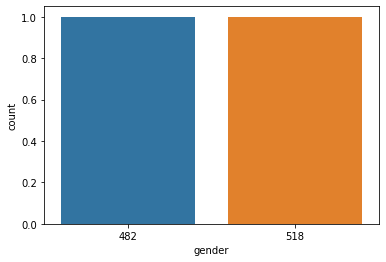

In [12]:
sns.countplot(x = dogs.gender.value_counts())

### 2. Create a visualization to illustrate any potential relationship between weight and height.!

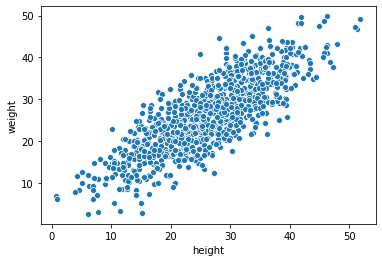

In [16]:
sns.scatterplot(x=dogs.height, y=dogs.weight)

## height and weight have a strong correlation according to the chart

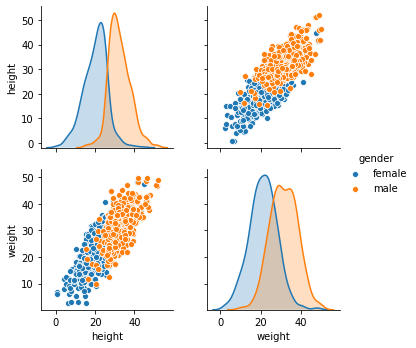

In [81]:
sns.pairplot(data=dogs, hue='gender')

### 3. Use linear regression to try to predict weight in terms of just height. Perform any analyses necessary to determine the applicability and effectiveness of the model. Imagine our business depends on accurately predicting the weight of dogs from height – what checks would you want to perform before you would be comfortable using the model in the real world? Please explain your analyses and findings.

In [82]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = dogs.height
y = dogs.weight

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1947.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):          8.90e-237
Time:                        15:01:04   Log-Likelihood:                -3013.8
No. Observations:                1000   AIC:                             6032.
Df Residuals:                     998   BIC:                             6041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8496      0.510      9.516      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Despite a relatievly low R squared and a strong predictor, the model works relatively well predicting the weight as the p-values are pretty low and coefficients are significant

### 4. Check whether the relationship between height and weight is different for different genders.

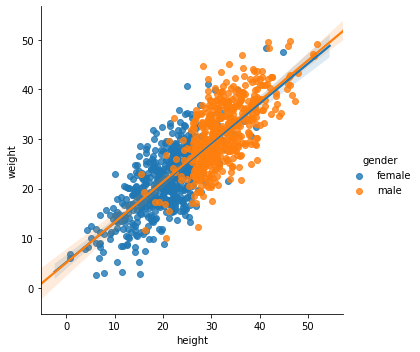

In [83]:
sns.lmplot(x='height', y='weight', data=dogs, hue="gender")

In [84]:
dogs[dogs.gender=='male']

,height,weight,gender
4,30.004165,27.738989,male
5,29.567665,36.835647,male
6,31.111444,39.074591,male
7,22.196279,34.336878,male
9,29.639770,22.438059,male
...,...,...,...
985,27.845743,28.324220,male
987,28.098425,36.875535,male
991,41.831322,49.596417,male
993,29.306294,28.831287,male


### 5. Undertake a suitable test to check whether the average weight of males is different from females.

### 1000 draws from the two pools of male and female dogs with each pool of 50 male and female dog can confirm the difference in between the averages.

In [47]:
female_mean = dogs[dogs.gender=='female'].mean()['weight']
male_mean = dogs[dogs.gender=='male'].mean()['weight']
print('weight of male', male_mean,'weight of female',female_mean, 'difference', male_mean-female_mean)

weight of male 31.510923688425333 weight of female 21.376003767656375 difference 10.134919920768958


In [70]:
import random
mean_difference = male_mean - female_mean
male_points = list(dogs[dogs.gender=='male']['weight'])
female_points = list(dogs[dogs.gender=='female']['weight'])
mean_differences = []
number_of_iterations = 1000

Mean Differences Mean: -10.15978186681575


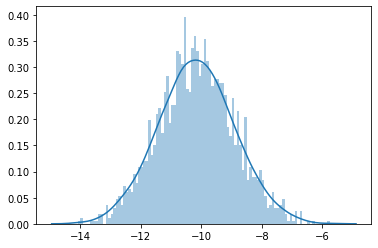

In [85]:
for i in range(number_of_iterations):
    group_1 = []
    group_2 = []
    for num in range(number_of_iterations):
        group_1 = random.sample(male_points, 50)
        group_2 = random.sample(female_points, 50)
    trial_mean_difference = np.mean(group_2) - np.mean(group_1)
    mean_differences.append(trial_mean_difference)
    
print("Mean Differences Mean: " + str(np.array(mean_differences).mean()))    
# Generate Frequency or Histogram Plot
sns.distplot(mean_differences, bins=100)

### 6. Use a suitable method to add gender as a predictor variable and include the following: a. Re-assess the quality of prediction with a suitable measure b. State which of the predictor variables are significant predictors of weight

In [61]:
dogs_final = pd.get_dummies(dogs)
dogs_final

,height,weight,gender_female,gender_male
0,23.024551,30.861741,1,0
1,24.034770,28.137327,1,0
2,22.757153,20.223910,1,0
3,14.685089,18.998547,1,0
4,30.004165,27.738989,0,1
...,...,...,...,...
995,16.449033,27.923151,1,0
996,18.890418,23.565038,1,0
997,11.949692,16.741746,1,0
998,15.421769,17.613603,1,0


In [63]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['height', 'weight']

# Make a copy of the our original df
census_minmax_transform = pd.DataFrame(data = dogs_final)

# Scale our numerica data
census_minmax_transform[numerical] = scaler.fit_transform(census_minmax_transform[numerical])

census_minmax_transform.head()

,height,weight,gender_female,gender_male
0,0.435920,0.598791,1,0
1,0.455654,0.541153,1,0
2,0.430696,0.373734,1,0
3,0.273012,0.347810,1,0
4,0.572263,0.532725,0,1


In [65]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = dogs_final.loc[:, dogs_final.columns != 'weight']
y = dogs_final.weight

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     973.5
Date:                Thu, 05 Mar 2020   Prob (F-statistic):          3.88e-235
Time:                        13:26:08   Log-Likelihood:                 842.27
No. Observations:                1000   AIC:                            -1679.
Df Residuals:                     997   BIC:                            -1664.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0455      0.010      4.547

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### height is the most significant predictor according to p-values and coefficients. Despite adding the gender, R squared remained almost the same.